In [67]:
import pandas as pd
import altair as alt

In [68]:
alt.themes.enable('opaque')
alt.data_transformers.enable('json')

DataTransformerRegistry.enable('json')

In [69]:
war = pd.read_csv("./input/war_daily_pitch.txt")

In [70]:
scrape = pd.read_csv("./input/standard_player_pitching_stats_all.csv")

In [71]:
df = war.merge(scrape[["player_ID", "year_ID", "team_ID", 'IP', 'earned_run_avg', 'fip']], on=["player_ID", "year_ID", "team_ID"])

### Lester vs. himself

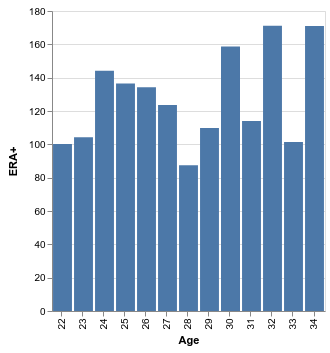

In [72]:
alt.Chart(df).mark_bar().encode(
    x=alt.X("age:O", axis=alt.Axis(title="Age")),
    y=alt.Y("ERA_plus:Q", axis=alt.Axis(title="ERA+")),
).transform_filter(alt.datum.name_common == 'Jon Lester')

### Lester vs. all starters ever

In [73]:
qualified_df = df[(df.age < 46) & (df.age > 17)]
qualified_df = qualified_df[~pd.isnull(qualified_df.age)]
qualified_df = qualified_df[(qualified_df.GS > 15) | (qualified_df.name_common == 'Jon Lester')]

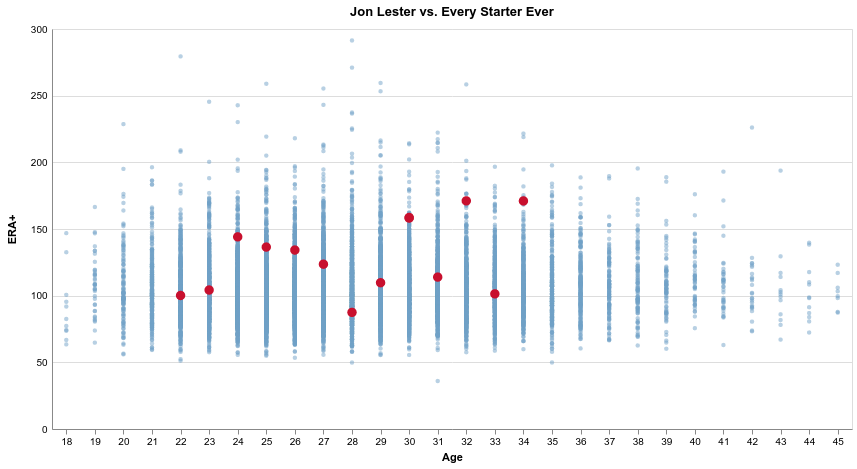

In [74]:
base = alt.Chart(qualified_df, title="Jon Lester vs. Every Starter Ever").properties(width=800, height=400).encode(
    x=alt.X("age:O", axis=alt.Axis(title="Age", labelAngle=0)),
    y=alt.Y("ERA_plus:Q", axis=alt.Axis(title="ERA+", tickCount=5, labelPadding=5, tickSize=0)),
    tooltip=["name_common", "year_ID", "ERA_plus"]
)

field = base.mark_circle(color="#71a0c6", size=20, opacity=0.5).transform_filter(alt.datum.name_common != 'Jon Lester')
lester = base.mark_circle(color="#C8102E", size=90, opacity=1).transform_filter(alt.datum.name_common == 'Jon Lester')

field + lester

### Top Age 34 seasons

In [75]:
qualified_df[qualified_df.age == 34].sort_values("ERA_plus", ascending=False)[[
    'name_common',
    'year_ID',
    'team_ID',
    'ERA_plus'
]].head(10).set_index("name_common")

,year_ID,team_ID,ERA_plus
name_common,,,
Roger Clemens,1997,TOR,221.573333
Cy Young,1901,BOS,218.980597
Nolan Ryan,1981,HOU,194.667857
Chris Carpenter,2009,STL,181.941667
Al Benton,1945,DET,175.358139
Thornton Lee,1941,CHW,173.654430
Jon Lester,2018,CHC,171.055172
Danny Darwin,1990,HOU,168.562500
Ray Kremer,1927,PIT,168.306452


### Top ERA+ this season

In [76]:
qualified_df[qualified_df.year_ID == 2018].sort_values("ERA_plus", ascending=False)[[
    'name_common',
    'age',
    'ERA_plus'
]].head(10).set_index("name_common")

,age,ERA_plus
name_common,,
Jacob deGrom,30.0,213.500000
Luis Severino,24.0,202.003448
Blake Snell,25.0,188.300000
Chris Sale,29.0,182.846875
Max Scherzer,33.0,180.375757
Trevor Bauer,27.0,179.721212
Aaron Nola,25.0,179.641935
Justin Verlander,35.0,177.766667
Corey Kluber,32.0,176.411428


### Comparison of ERA+ with FIP

In [140]:
era_df = df[(df.IP >= 100)]

In [141]:
era_df['E-F'] = era_df['earned_run_avg'] - era_df['fip']

/home/palewire/.virtualenvs/troutcast/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [255]:
era_df['E-F'].describe()

count    14499.000000
mean        -0.037954
std          0.600189
min         -2.110000
25%         -0.440000
50%         -0.070000
75%          0.330000
max          2.770000
Name: E-F, dtype: float64

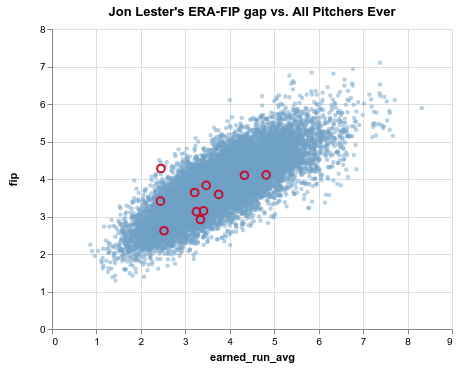

In [251]:
base = alt.Chart(era_df, title="Jon Lester's ERA-FIP gap vs. All Pitchers Ever").encode(
    x=alt.X("earned_run_avg:Q"),
    y=alt.Y("fip:Q"),
    tooltip=["name_common", "year_ID", "earned_run_avg", "fip", "E-F"]
)

field = base.mark_circle(color="#71a0c6", size=20, opacity=0.5).transform_filter(
    (alt.datum.name_common != 'Jon Lester') 
)
lester = base.mark_circle(color="#C8102E", size=60, opacity=1, filled=False).transform_filter(
    (alt.datum.name_common == 'Jon Lester') 
)

field + lester

### Top ERA-FIP gaps of all-time

In [150]:
era_df.sort_values("E-F", ascending=True).head(15)[[
    'name_common',
    'team_ID',
    'IP',
    'year_ID',
    'earned_run_avg',
    'fip',
    'E-F'
]]

,name_common,team_ID,IP,year_ID,earned_run_avg,fip,E-F
39921,Denny Stark,COL,128.1,2002,4.00,6.11,-2.11
21791,Ellis Kinder,BOS,107.0,1953,1.85,3.96,-2.11
10146,Leo Dickerman,STL,119.2,1924,2.41,4.50,-2.09
26250,Al Maul,WHS,135.2,1895,2.45,4.44,-1.99
35947,Eddie Rommel,PHA,113.2,1929,2.85,4.79,-1.94
40718,Steve Sundra,NYY,120.2,1939,2.76,4.67,-1.91
30834,Curly Ogden,WSH,108.0,1924,2.58,4.45,-1.87
28090,Alan Mills,BAL,100.1,1993,3.23,5.09,-1.86
29502,Tom Murphy,MIL,123.0,1974,1.90,3.74,-1.84
36449,Amos Rusie,NYG,444.0,1894,2.78,4.61,-1.83


In [256]:
era_df.sort_values("E-F", ascending=False).head(15)[[
    'name_common',
    'team_ID',
    'IP',
    'year_ID',
    'earned_run_avg',
    'fip',
    'E-F'
]]

,name_common,team_ID,IP,year_ID,earned_run_avg,fip,E-F
31838,Camilo Pascual,WSH,129.0,1955,6.14,3.37,2.77
17481,Egyptian Healy,WHS,101.0,1889,6.24,3.57,2.67
15864,Lefty Grove,BOS,109.1,1934,6.50,3.83,2.67
1404,Johnny Babich,BRO,143.1,1935,6.66,4.05,2.61
13654,Benny Frey,CIN,114.1,1935,6.85,4.26,2.59
3017,Herman Besse,PHA,133.0,1942,6.16,3.58,2.58
33842,Jack Quinn,NYY,102.2,1912,5.79,3.23,2.56
36422,Glendon Rusch,MIL,123.1,2003,6.42,3.87,2.55
43990,Sam Weaver,PHK,136.0,1884,5.76,3.22,2.54
11633,Hal Elliott,PHI,117.1,1930,7.67,5.15,2.52


### Top ERA-FIP gaps of each year

In [145]:
top_ef_by_year = era_df.sort_values(
    ["year_ID", "E-F", "earned_run_avg"],
    ascending=[False, True, True]
).drop_duplicates(["year_ID"])[[
    'year_ID',
    'name_common',
    'team_ID',
    'IP',
    'earned_run_avg',
    'fip',
    'E-F'
]]

In [148]:
top_ef_by_year.head()

,year_ID,name_common,team_ID,IP,earned_run_avg,fip,E-F
23846,2018,Jon Lester,CHC,106.1,2.45,4.28,-1.83
24945,2017,Lance Lynn,STL,186.1,3.43,4.82,-1.39
12714,2016,Brandon Finnegan,CIN,172.0,3.98,5.19,-1.21
46194,2015,Chris Young,KCR,123.1,3.06,4.52,-1.46
15060,2014,Miguel Gonzalez,BAL,159.0,3.23,4.89,-1.66


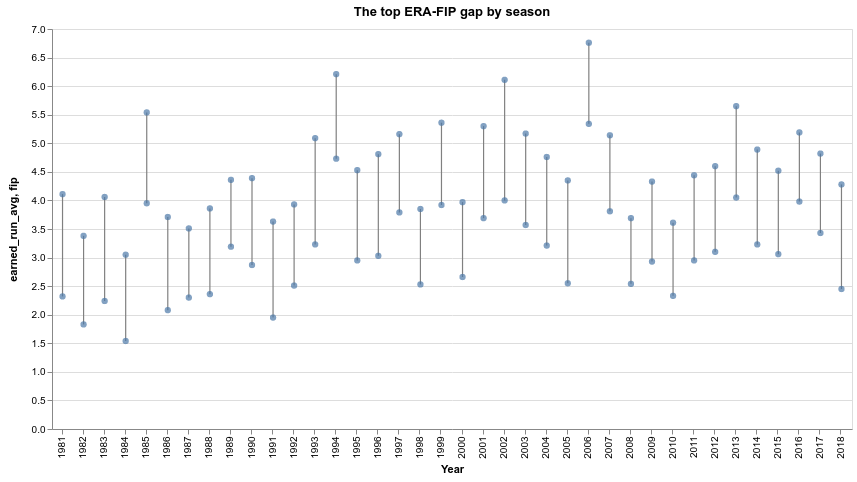

In [257]:
base = alt.Chart(top_ef_by_year, title="The top ERA-FIP gap by season").transform_filter(
    alt.datum.year_ID > 1980
).properties(
    width=800,
    height=400
)

bars = base.mark_rule(strokeWidth=1.2, color='gray').encode(
    x=alt.X("year_ID:O", axis=alt.Axis(title="Year")),
    y=alt.Y("earned_run_avg:Q"),
    y2=alt.Y("fip:Q")
)

point1 = base.mark_point(filled=True, size=40).encode(
    x=alt.X("year_ID:O"),
    y=alt.Y("earned_run_avg:Q"),
    tooltip=["earned_run_avg"]
)

point2 = base.mark_point(filled=True, size=40).encode(
    x=alt.X("year_ID:O"),
    y=alt.Y("fip:Q"),
    tooltip=["fip"]
)


bars + point1 + point2

### Lester's ERA-FIP gap throughout his career

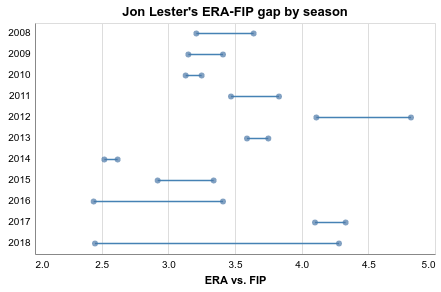

In [209]:
base = alt.Chart(era_df, title="Jon Lester's ERA-FIP gap by season").transform_filter(
    alt.datum.name_common == 'Jon Lester'
)

gap = base.mark_rule(strokeWidth=1.5, color='steelblue').encode(
    x=alt.X(
        "earned_run_avg:Q",
        axis=alt.Axis(title="ERA vs. FIP", tickSize=0, labelPadding=5, tickCount=5),
        scale=alt.Scale(domain=[2, 5])
    ),
    x2=alt.X("fip:Q"),
    y=alt.Y(
        "year_ID:O",
        axis=alt.Axis(title=None, tickSize=0, labelPadding=5),
    ),
)

era = base.mark_point(filled=True, size=35).encode(
    x=alt.X("earned_run_avg:Q"),
    y=alt.Y("year_ID:O"),
    tooltip=["earned_run_avg"],
)

fip = base.mark_point(filled=True, size=35).encode(
    x=alt.X("fip:Q"),
    y=alt.Y("year_ID:O"),
    tooltip=["fip"]
)


gap + era + fip

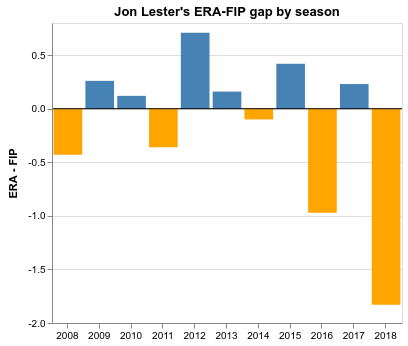

In [247]:
bars = alt.Chart(era_df, title="Jon Lester's ERA-FIP gap by season").transform_filter(
    alt.datum.name_common == 'Jon Lester'
).mark_bar().encode(
    y=alt.Y("E-F:Q", axis=alt.Axis(title="ERA - FIP")),
    x=alt.X(
        "year_ID:O",
        axis=alt.Axis(title=None, labelAngle=0)
    ),
    color=alt.condition(
        alt.datum['E-F'] > 0,
        alt.value('steelblue'),
        alt.value('orange')
    )
).properties(width=350)

rule = alt.Chart(pd.DataFrame([{"value": 0}])).mark_rule().encode(
    y='value:Q'
)

bars + rule